<a href="https://colab.research.google.com/github/pra961/MAT421/blob/main/ModuleH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Error and Instability

The stability of an integration scheme is its ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable.

To illustrate issues of stability, we numerically solve the pendulum equation using the Euler Explicit, Euler Implicit, and Trapezoidal Formulas.

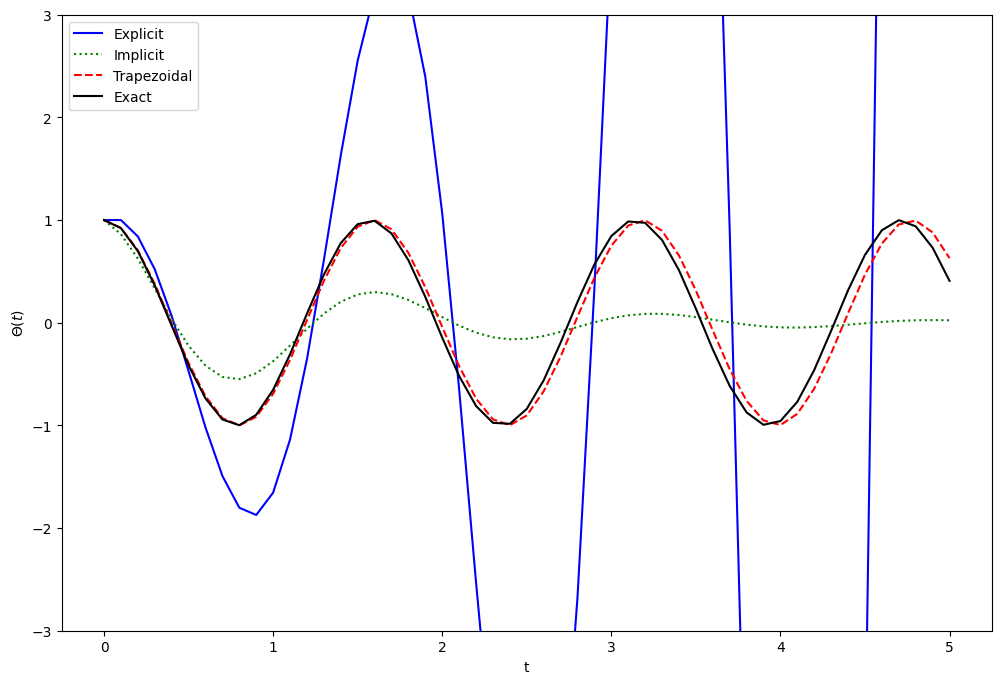

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline

h = 0.1
t = np.arange(0, 5.1, h)
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

We can see above that the Trapezoidal method is correct.

# Predictor-Corrector Methods

Given any time and state value, the function, 𝐹(𝑡,𝑆(𝑡))
, returns the change of state 𝑑𝑆(𝑡)𝑑𝑡
. Predictor-corrector methods of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the 𝐹
 function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state.

Predictor Step: 𝑆(𝑡_𝑗+ℎ/2)=𝑆(𝑡_𝑗)+ℎ/2*𝐹(𝑡_𝑗,𝑆(𝑡_𝑗))

Corrector Step:𝑆(𝑡_(𝑗+1))=𝑆(𝑡_𝑗)+ℎ*𝐹(𝑡_𝑗+ℎ/2,𝑆(𝑡_𝑗+ℎ/2))